---
title: Palmer Penguins Modeling
author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---



Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [24]:
!pip install palmerpenguins

In [25]:
# Import libraries
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

In [26]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [27]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [28]:
penguins = load_penguins().dropna() #removing the missing values from the dataframe
penguins["bill_length_mm"].describe()

count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

**We would dummify species, island, and sex variables**

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

#Simple linear regression (e.g. straight-line) model

In [29]:
bill_model = LinearRegression() # specifying model for prediction

X = penguins[['bill_length_mm']] # predictor variable
y = penguins['bill_depth_mm'] # response variable

bill_model.fit(X, y)

LinearRegression()

In [30]:
bill_model.coef_, bill_model.intercept_

(array([-0.08232675]), np.float64(20.786648668433827))

In [31]:
# Adding model predictions to a dataframe to be used later for the scatter plot
df_pred = penguins[['bill_length_mm', 'bill_depth_mm']].copy()
df_pred['bill_depth_pred_simple'] = bill_model.predict(X)
df_pred

,bill_length_mm,bill_depth_mm,bill_depth_pred_simple
0,39.1,18.7,17.567673
1,39.5,17.4,17.534742
2,40.3,18.0,17.468881
4,36.7,19.3,17.765257
5,39.3,20.6,17.551207
...,...,...,...
339,55.8,19.8,16.192816
340,43.5,18.1,17.205435
341,49.6,18.2,16.703242
342,50.8,19.0,16.604450


#Quadratic (degree 2 polynomial) model

In [32]:
penguins["bill_length_square"] = penguins["bill_length_mm"]**2  #creating a new column in dataframe for squared values
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_square
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49


In [33]:
square_model = LinearRegression() #specifying model for prediction

X = penguins[["bill_length_mm", "bill_length_square"]]
y = penguins["bill_depth_mm"]

square_model.fit(X, y)

LinearRegression()

In [34]:
square_model.coef_, square_model.intercept_

(array([-1.40407712,  0.01498039]), np.float64(49.49494362318971))

In [35]:
df_pred['bill_depth_pred_quad'] = square_model.predict(X)
df_pred

,bill_length_mm,bill_depth_mm,bill_depth_pred_simple,bill_depth_pred_quad
0,39.1,18.7,17.567673,17.497696
1,39.5,17.4,17.534742,17.407049
2,40.3,18.0,17.468881,17.240135
4,36.7,19.3,17.765257,18.142249
5,39.3,20.6,17.551207,17.451773
...,...,...,...,...
339,55.8,19.8,16.192816,17.790977
340,43.5,18.1,17.205435,16.764229
341,49.6,18.2,16.703242,16.706871
342,50.8,19.0,16.604450,16.826816


# Cubic (degree 3 polynomial) model

In [36]:
penguins["bill_length_cube"] = penguins["bill_length_mm"]**3
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_square,bill_length_cube
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457


In [37]:
cubic_model = LinearRegression()

X = penguins[["bill_length_mm", "bill_length_square", "bill_length_cube"]]
y = penguins["bill_depth_mm"]

cubic_model.fit(X, y)

LinearRegression()

In [38]:
cubic_model.coef_, cubic_model.intercept_

(array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03]),
 np.float64(-70.53172659621671))

In [39]:
df_pred['bill_depth_pred_cubic'] = cubic_model.predict(X)
df_pred

,bill_length_mm,bill_depth_mm,bill_depth_pred_simple,bill_depth_pred_quad,bill_depth_pred_cubic
0,39.1,18.7,17.567673,17.497696,17.766833
1,39.5,17.4,17.534742,17.407049,17.693524
2,40.3,18.0,17.468881,17.240135,17.540285
4,36.7,19.3,17.765257,18.142249,18.127376
5,39.3,20.6,17.551207,17.451773,17.730509
...,...,...,...,...,...
339,55.8,19.8,16.192816,17.790977,18.578143
340,43.5,18.1,17.205435,16.764229,16.915794
341,49.6,18.2,16.703242,16.706871,16.454992
342,50.8,19.0,16.604450,16.826816,16.602346


# Degree 10 polynomial model

In [40]:
penguins["bill_length_deg4"] = penguins["bill_length_mm"]**4
penguins["bill_length_deg5"] = penguins["bill_length_mm"]**5
penguins["bill_length_deg6"] = penguins["bill_length_mm"]**6
penguins["bill_length_deg7"] = penguins["bill_length_mm"]**7
penguins["bill_length_deg8"] = penguins["bill_length_mm"]**8
penguins["bill_length_deg9"] = penguins["bill_length_mm"]**9
penguins["bill_length_deg10"] = penguins["bill_length_mm"]**10

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_square,bill_length_cube,bill_length_deg4,bill_length_deg5,bill_length_deg6,bill_length_deg7,bill_length_deg8,bill_length_deg9,bill_length_deg10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15


In [41]:
deg10_model = LinearRegression()

X = penguins[["bill_length_mm", "bill_length_square", "bill_length_cube",
              "bill_length_deg4", "bill_length_deg5", "bill_length_deg6",
              "bill_length_deg7", "bill_length_deg8", "bill_length_deg9",
              "bill_length_deg10"]]

y = penguins["bill_depth_mm"]

deg10_model.fit(X, y)

LinearRegression()

In [42]:
deg10_model.coef_, deg10_model.intercept_

(array([ 9.30261877e-14,  4.60934140e-12,  1.56064783e-10,  4.04003958e-09,  7.67183179e-08,  8.42985453e-07,
        -6.03511104e-08,  1.63196189e-09, -1.97124749e-11,  8.95411667e-14]),
 np.float64(-21.34276657720836))

In [43]:
df_pred['bill_depth_pred_deg10'] = deg10_model.predict(X)
df_pred

,bill_length_mm,bill_depth_mm,bill_depth_pred_simple,bill_depth_pred_quad,bill_depth_pred_cubic,bill_depth_pred_deg10
0,39.1,18.7,17.567673,17.497696,17.766833,18.392434
1,39.5,17.4,17.534742,17.407049,17.693524,18.272268
2,40.3,18.0,17.468881,17.240135,17.540285,17.969702
4,36.7,19.3,17.765257,18.142249,18.127376,18.483352
5,39.3,20.6,17.551207,17.451773,17.730509,18.335297
...,...,...,...,...,...,...
339,55.8,19.8,16.192816,17.790977,18.578143,18.617067
340,43.5,18.1,17.205435,16.764229,16.915794,16.459582
341,49.6,18.2,16.703242,16.706871,16.454992,16.628963
342,50.8,19.0,16.604450,16.826816,16.602346,17.288916


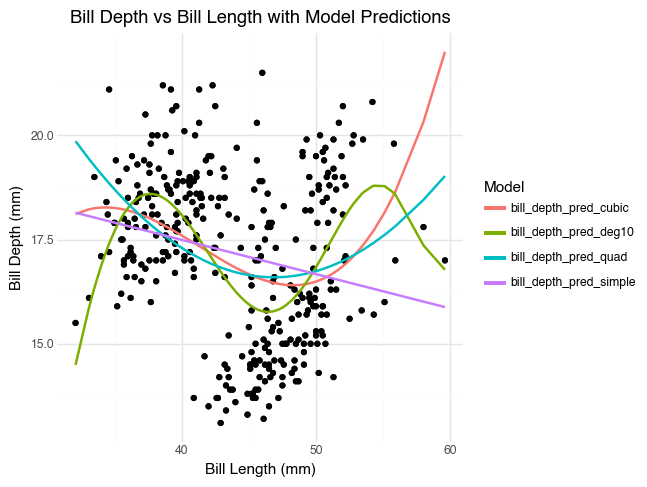

In [44]:
df_long = df_pred.melt(
    id_vars=['bill_length_mm', 'bill_depth_mm'],
    value_vars=['bill_depth_pred_simple', 'bill_depth_pred_quad',
                'bill_depth_pred_cubic', 'bill_depth_pred_deg10'],
    var_name='Model',
    value_name='Predicted'
)

plot = (
    ggplot(df_long, aes(x='bill_length_mm')) +
    geom_point(aes(y='bill_depth_mm'), color='black', alpha=0.6) +
    geom_line(aes(y='Predicted', color='Model'), size=1) +
    labs(
        title='Bill Depth vs Bill Length with Model Predictions',
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        color='Model'
    ) +
    theme_minimal()
)
plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell? 
Simple Linear Regression (i.e. Model 1) is underfitting data. It's too simple and is not capturing the main trend and variations in the data.

* Are any of the models above overfitting the data? If so, which ones and how can you tell? Degree 10 Polynomial Model is overfitting the data, since it is taking too many predictor variables to predict the model and thus capturing the every small noise and variation in the data. This causes the model to do well on training data but poorly on new data because it learns the noise instead of the main pattern.


* Which of the above models do you think fits the data best and why? Quadratic Model (i.e. Model 2) fits the data best. Its U-shaped curve captures the main trend and variations in the data. It gives a good balance between underfitting and overfitting, making it the best model for this relationship.